#  CodSoft-----Machine Learning Internship

## Task 2:  SPAM SMS DETECTION

#### In this task, I am build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings withclassifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset collection

In [2]:
df = pd.read_csv("1_spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocessing dataset

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df_new = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] , axis = 1)

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df_new.columns = ["target","message"]

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df_new.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
print(f" Total length of dataset:{len(df_new)}")

 Total length of dataset:5572


# Data exploration

In [13]:
df_new.target.value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

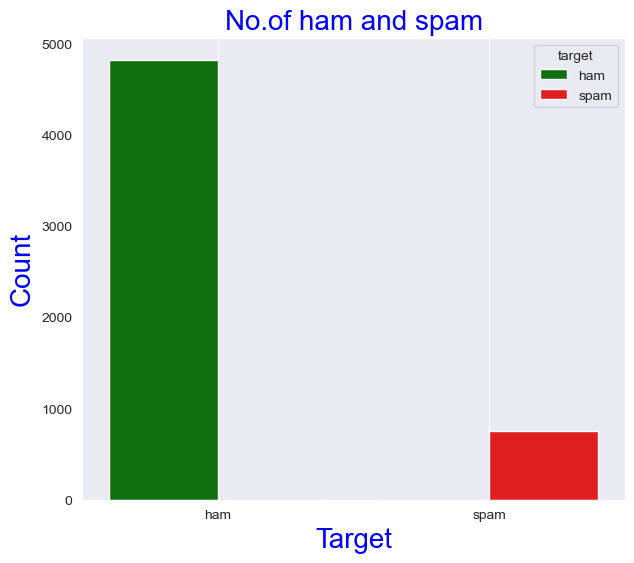

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize = (7,6))

sns.countplot(x = df_new.target , hue = df_new.target , data= df_new , 
             palette = {"ham":"green","spam":"red"}
             )

plt.grid()
plt.title("No.of ham and spam",fontsize = 20 , color = "b")
plt.xlabel("Target", fontsize = 20 , color = "b")
plt.ylabel("Count", fontsize = 20 , color = "b")
plt.show()

# Model preparation

In [15]:
df_new.target = df_new.target.map({"ham":0 , "spam":1})

In [16]:
df_new["target"].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [17]:
df_new.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
X = df_new.message

In [19]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [20]:
Y = df_new["target"]

In [21]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def text_data_preprocessing(Z):
    vectorizer = CountVectorizer()
    tfidf_transformer = TfidfTransformer()
    
    Z_counts = vectorizer.fit_transform(Z)
    Z_tfidf = tfidf_transformer.fit_transform(Z_counts)
    
    return Z_tfidf

X_train_tfidf = text_data_preprocessing(X_train)
#X_test_tfidf = text_data_preprocessing(X_test)

In [24]:
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [25]:
X_train_counts = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [26]:
X_train_tfidf

<4179x7355 sparse matrix of type '<class 'numpy.float64'>'
	with 55131 stored elements in Compressed Sparse Row format>

In [27]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [28]:
X_test_tfidf

<1393x7355 sparse matrix of type '<class 'numpy.float64'>'
	with 17357 stored elements in Compressed Sparse Row format>

# Model Selection

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [30]:
model_1 = LogisticRegression()
model_2 = MultinomialNB()
model_3 = SVC(kernel="linear")

In [31]:
#LogisticRegression

In [32]:
model_1.fit(X_train_tfidf,Y_train)

LogisticRegression()

In [33]:
x_train_accuracy_1 = model_1.predict(X_train_tfidf)
x_test_accuracy_1 = model_1.predict(X_test_tfidf)

training_data_accuracy_1 = accuracy_score(x_train_accuracy_1,Y_train)
testing_data_accuracy_1 = accuracy_score(x_test_accuracy_1,Y_test)

print("Training Accuracy :" , training_data_accuracy_1*100)
print("Testing Accuracy :" , testing_data_accuracy_1*100)

Training Accuracy : 97.43957884661403
Testing Accuracy : 96.69777458722182


In [36]:
print(f"\nClassification Report for Logistic Regression:\n{classification_report(Y_test, x_test_accuracy_1)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.77      0.87       197

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



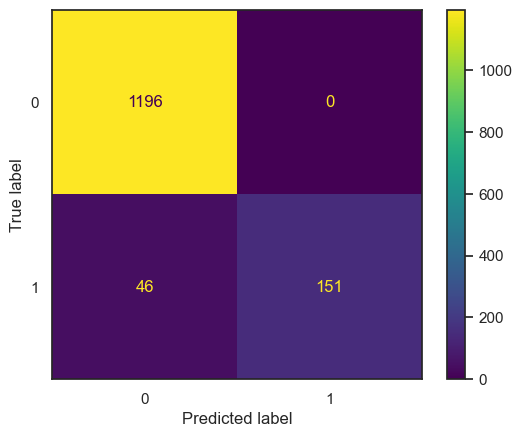

In [37]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_1, X_test_tfidf, Y_test , cmap = "viridis")

plt.show()

# Model prediction

In [55]:
def model_1_prediction(input_text):
    
    input_counts = vectorizer.transform([input_text])
    input_tfidf = tfidf_transformer.transform(input_counts)
    
    prediction = model_1.predict(input_tfidf)
    
    if prediction[0] == 0:
        result = "Ham"
    else:
        result = "Spam"
        
        
    return result

In [56]:
input_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
model_1_prediction(input_text)

'Ham'

In [57]:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's "
model_1_prediction(input_text)

'Spam'

In [58]:
# model_1 predict accuratly

# MultinomialNB

In [34]:
model_2.fit(X_train_tfidf,Y_train)

MultinomialNB()

In [38]:
x_train_accuracy_2 = model_2.predict(X_train_tfidf)
x_test_accuracy_2 = model_2.predict(X_test_tfidf)

training_data_accuracy_2 = accuracy_score(x_train_accuracy_2,Y_train)
testing_data_accuracy_2 = accuracy_score(x_test_accuracy_2,Y_test)

print("Training Accuracy :" , training_data_accuracy_2*100)
print("Testing Accuracy :" , testing_data_accuracy_2*100)

Training Accuracy : 97.31993299832496
Testing Accuracy : 94.90308686288586


In [50]:
print(f"\nClassification Report for MultinomialNB:\n{classification_report(Y_test, x_test_accuracy_2)}")


Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1196
           1       1.00      0.64      0.78       197

    accuracy                           0.95      1393
   macro avg       0.97      0.82      0.88      1393
weighted avg       0.95      0.95      0.94      1393



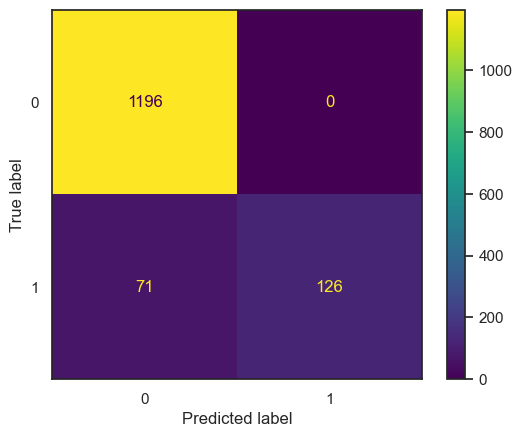

In [40]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_2, X_test_tfidf, Y_test , cmap = "viridis")

plt.show()

# Model prediction

In [59]:
def model_2_prediction(input_text):
    
    input_counts = vectorizer.transform([input_text])
    input_tfidf = tfidf_transformer.transform(input_counts)
    
    prediction = model_2.predict(input_tfidf)
    
    if prediction[0] == 0:
        result = "Ham"
    else:
        result = "Spam"
        
        
    return result

In [60]:
input_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
model_2_prediction(input_text)

'Ham'

In [61]:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's "
model_2_prediction(input_text)

'Spam'

# Support Vectore Machine

In [35]:
model_3.fit(X_train_tfidf,Y_train)

SVC(kernel='linear')

In [41]:
x_train_accuracy_3 = model_3.predict(X_train_tfidf)
x_test_accuracy_3 = model_3.predict(X_test_tfidf)

training_data_accuracy_3 = accuracy_score(x_train_accuracy_3,Y_train)
testing_data_accuracy_3 = accuracy_score(x_test_accuracy_3,Y_test)

print("Training Accuracy :" , training_data_accuracy_3*100)
print("Testing Accuracy :" , testing_data_accuracy_3*100)

Training Accuracy : 99.56927494615937
Testing Accuracy : 98.63603732950466


In [51]:
print(f"\nClassification Report for Support Vectore Machine:\n{classification_report(Y_test, x_test_accuracy_3)}")


Classification Report for Support Vectore Machine:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1196
           1       1.00      0.90      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



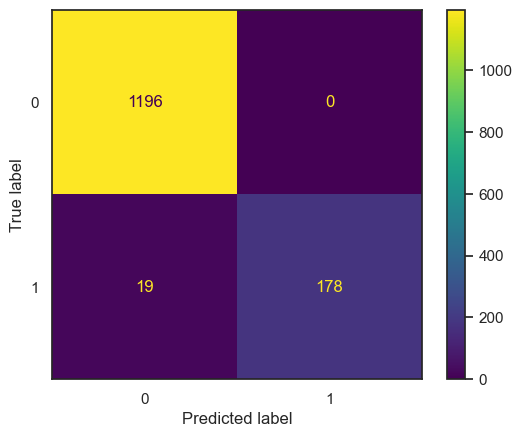

In [43]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_3, X_test_tfidf, Y_test , cmap = "viridis")

plt.show()

# Model prediction

In [62]:
def model_3_prediction(input_text):
    
    input_counts = vectorizer.transform([input_text])
    input_tfidf = tfidf_transformer.transform(input_counts)
    
    prediction = model_3.predict(input_tfidf)
    
    if prediction[0] == 0:
        result = "Ham"
    else:
        result = "Spam"
        
        
    return result

In [63]:
input_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
model_3_prediction(input_text)

'Ham'

In [64]:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's "
model_3_prediction(input_text)

'Spam'

# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()

In [46]:
model_4.fit(X_train_tfidf,Y_train)

DecisionTreeClassifier()

In [47]:
x_train_accuracy_4 = model_4.predict(X_train_tfidf)
x_test_accuracy_4 = model_4.predict(X_test_tfidf)

training_data_accuracy_4 = accuracy_score(x_train_accuracy_4,Y_train)
testing_data_accuracy_4 = accuracy_score(x_test_accuracy_4,Y_test)

print('Training Accuracy : ', training_data_accuracy_4*100)
print('Testing  Accuracy : ', testing_data_accuracy_4*100)

Training Accuracy :  100.0
Testing  Accuracy :  95.33381191672649


In [48]:
print(f"\nClassification Report for DecisionTreeClassifier:\n{classification_report(Y_test, x_test_accuracy_4)}")


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1196
           1       0.85      0.82      0.83       197

    accuracy                           0.95      1393
   macro avg       0.91      0.90      0.90      1393
weighted avg       0.95      0.95      0.95      1393



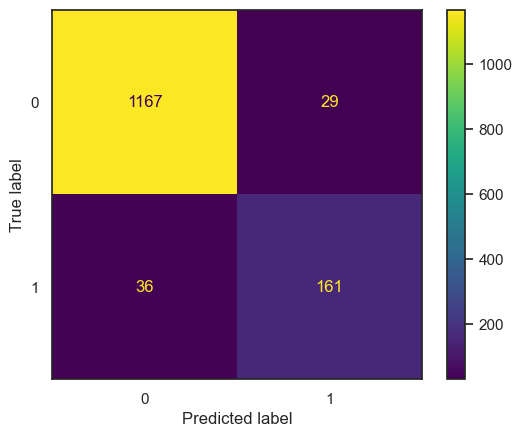

In [49]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_4, X_test_tfidf, Y_test , cmap = "viridis")

plt.show()

# Model prediction

In [66]:
def model_4_prediction(input_text):
    
    input_counts = vectorizer.transform([input_text])
    input_tfidf = tfidf_transformer.transform(input_counts)
    
    prediction = model_4.predict(input_tfidf)
    
    if prediction[0] == 0:
        result = "Ham"
    else:
        result = "Spam"
        
        
    return result

In [67]:
input_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
model_4_prediction(input_text)

'Ham'

In [68]:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's "
model_4_prediction(input_text)

'Spam'